In [66]:
import polars as pl
import numpy as np
import os
import json
os.chdir(os.path.expanduser('~/vEcoli/notebooks/mia_notebooks/metal_count_data/'))
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Set the default style
sns.set(style="darkgrid")

## template

Media type:  media

Bacterial species:

Units used in calculations:

QUESTIONS/ISSUES:

# Minimal Media Conditions Data

## Covert Lab Minimal Media simulation data 

Media type: minimal media (MOPS?)

Bacterial species: E. coli K-12 MG1655 (I am assuming this strain)

Units used in calculations: Atoms/cell

QUESTIONS/ISSUES:

In [67]:
#CL_col_names = ["Co", "Cu", "Fe", "Mo", "Zn", "Ni", "V", "Cr"]
#CL_values = [0.0, 8494.231262, 267598.232091, 2190.045015, 215018.559173, 684.082189, 0.0, 0.0] # each corresponds to the element in the CL_col_names list

# since the data contains multiple 0.0 values, just remove those since they cannot have the log10 taken of them anyway.
CL_col_names = ["Cu", "Fe", "Mo", "Zn", "Mn","Ni"]
CL_values = [8494.231262, 267598.232091, 2190.045015, 215018.559173, 36049.755197, 684.082189]
CL_values = np.log10(CL_values) # convert to log10

# generate a data frame: 
CL_mm_df = pl.DataFrame({"Element": CL_col_names, "$\t{E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)": CL_values})
CL_mm_df

Element,$ {E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)
str,f64
"""Cu""",3.929124
"""Fe""",5.427483
"""Mo""",3.340453
"""Zn""",5.332476
"""Mn""",4.556902
"""Ni""",2.835108


## Outten & O'Halloran, Science, 2001 (https://pubmed.ncbi.nlm.nih.gov/11397910/)

Media type: a custom A minimal media

Bacterial species: I believe E. coli BW25113

Units used in calculations: Atoms/cell

QUESTIONS/ISSUES:
- need to confirm what type of minimal media conditions are used!

In [68]:
# load in the minimal media data from Outten & O'Halloran, 2001: https://pubmed.ncbi.nlm.nih.gov/11397910/
GT_data = pd.read_csv("cofactor_ground_truth_data_from_cyrus_for_mia.csv")
GT_mm_data = GT_data[:9]
GT_mm_df = pl.DataFrame(GT_mm_data[["Element","Atoms/cell"]])
GT_mm_df = GT_mm_df.with_columns(pl.col("Atoms/cell").log10().alias("$\t{E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)"))
GT_mm_df = pl.DataFrame(GT_mm_df[["Element", "$\t{E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)"]])

# replace the element names with the column names:
col_names = ["Mo", "Zn", "Cu", "Ni", "Co", "Fe", "Mn", "Cr", "V"]
GT_mm_df = GT_mm_df.with_columns(pl.col("Element").replace(pl.col("Element"), col_names).alias("Element"))
GT_mm_df

Element,"$ {E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)"
str,f64
"""Mo""",3.600246
"""Zn""",5.300613
"""Cu""",3.894907
"""Ni""",3.577501
"""Co""",2.716067
"""Fe""",5.25522
"""Mn""",3.520492
"""Cr""",3.192079
"""V""",2.96536


## Minimal media data from Huynh et al., 2022 fig 1c and 1d (https://journals.asm.org/doi/full/10.1128/spectrum.01006-21): 

Media type: a-minimal media

Bacterial species: E. coli K-12 BW25113

Units used in calculations: Atoms/CFU

QUESTIONS/ISSUES: 

In [69]:
# load in minimal media data from Huynh et al., 2022 fig 1c and d (https://journals.asm.org/doi/full/10.1128/spectrum.01006-21): 
H_mm_2022 = pd.read_excel("Huynh_2022_F1CD_data.xlsx")

# convert data frames to polars data frames and rename the columns to be more descriptive: 
H_mm_2022 = pl.DataFrame(H_mm_2022[["Element","log10 AM (atoms/CFU)"]])
H_mm_2022 = H_mm_2022.with_columns(pl.col("log10 AM (atoms/CFU)").alias("$\t{E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"))
H_mm_2022 = pl.DataFrame(H_mm_2022[["Element", "$\t{E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"]])
H_mm_2022

Element,"$ {E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"
str,f64
"""Mn""",2.913947
"""Fe""",5.780415
"""Cu""",3.661721
"""Zn""",4.142433
"""V""",2.449304
"""Cr""",3.903579
"""Co""",1.586481
"""Ni""",2.922465


## Minimal media data from Budhraja, et al., 2019 Fig 1 (https://academic.oup.com/metallomics/article/11/5/925/5962190#supplementary-data):

Media type: minimal media

Bacterial species: BW25113 (based off communication with author)

Units used in calculations: metal ions per cell

QUESTIONS/ISSUES:
- media makeup is quite custom, how should I name it in the graph? 

In [70]:
# load in the minimal media data from Budhraja et al., 2019: https://academic.oup.com/metallomics/article/11/5/925/5962190#supplementary-data
B_mm_2019 = pd.read_excel("Budhraja_2019_F1all_2019.xlsx")
B_mm_air_2019 = pl.DataFrame(B_mm_2019[["Element","log10 MM air (metal ions per cell)"]])
B_mm_air_2019 = B_mm_air_2019.with_columns(pl.col("log10 MM air (metal ions per cell)").alias("$\t{E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)"))

B_mm_xair_2019 = pl.DataFrame(B_mm_2019[["Element","log10 MM xair (metal ions per cell) "]])
B_mm_xair_2019 = B_mm_xair_2019.with_columns(pl.col("log10 MM xair (metal ions per cell) ").alias("$\t{E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"))
B_mm_xair_2019

Element,log10 MM xair (metal ions per cell),"$ {E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"
str,f64,f64
"""Fe""",6.875181,6.875181
"""Co""",5.354136,5.354136
"""Ni""",4.111756,4.111756
"""Mo""",4.680697,4.680697


## M9 media from Umemura et al., 2017, table 11.2 (https://link.springer.com/chapter/10.1007/978-4-431-56463-8_11):

Media type: M9 media

Bacterial species: E. coli K-12 MG1655

Units used in calculations: atoms/cell

QUESTIONS/ISSUES:

In [71]:
# M9 data from Umemura et al., 2017, table 11.2 (https://link.springer.com/chapter/10.1007/978-4-431-56463-8_11): 
U_mm_2017 = pd.read_excel("Umemura_2017_T112_data.xlsx")

# transform into a polars data frame and rename the columns:
U_mm_2017 = pl.DataFrame(U_mm_2017[["Symbol","E. coli\xa0MG1655 in M9"]])
U_mm_2017 = U_mm_2017.with_columns(pl.col("E. coli\xa0MG1655 in M9").log10().alias("$\t{E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)"))
U_mm_2017 = U_mm_2017.rename({"Symbol": "Element"})
U_mm_2017

Element,E. coli MG1655 in M9,"$ {E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)"
str,f64,f64
"""Mg""",1.1e8,8.041393
"""P""",5.6e8,8.748188
"""S""",1.5e8,8.176091
"""K""",4.2e8,8.623249
"""Ca""",3.8e6,6.579784
…,…,…
"""Au""",null,null
"""Tl""",null,null
"""Pb""",120.0,2.079181


## MOPS data from Xu, et al., 2017, figure 1a: https://www.sciencedirect.com/science/article/pii/S002192582030538X?via%3Dihub#sec1

Media type: MOPS media

Bacterial species: E. coli MG1655

Units used in calculations: Intracellular metal content (per cell) in No Zn(II) supplement (assuming this means atoms/cell)

QUESTIONS/ISSUES: 
- comfirm that the units are equivalent to atoms/cell

In [72]:
# load in the data from Xu et al., 2017, figure 1a: https://www.sciencedirect.com/science/article/pii/S002192582030538X?via%3Dihub#sec1
Xu_F1A_2019 = pd.read_excel("Xu_2019_F1A_data.xlsx")
X_mm_2019 = pl.DataFrame(Xu_F1A_2019[["Element","Intracellular metal content (per cell) in No Zn(II) supplement"]])
X_mm_2019 = X_mm_2019.with_columns(pl.col("Intracellular metal content (per cell) in No Zn(II) supplement").log10().alias("$\t{E. coli}$ MG1655 in MOPS (Xu et al., 2019)"))
X_mm_2019

Element,Intracellular metal content (per cell) in No Zn(II) supplement,"$ {E. coli}$ MG1655 in MOPS (Xu et al., 2019)"
str,i64,f64
"""Zn""",140000,5.146128
"""Fe""",380000,5.579784
"""Mn""",32000,4.50515
"""Ni""",3000,3.477121
"""Cu""",20000,4.30103


## M9 Media data from Osman, et al., 2019: https://www.nature.com/articles/s41589-018-0211-4#Sec24

Media type: M9 minimal medium, supplemented with thiamine (10 μg ml−1) and L-histidine (20 μg ml−1)

Bacterial species: Salmonella enterica serovar Typhimurium strain SL1344 

Units used in calculations: atoms/cell

QUESTIONS/ISSUES:
- not sure how I should mention the other additivies in the media 

In [73]:
# load in the data from Osman et al., 2019: https://www.nature.com/articles/s41589-018-0211-4#Sec24
Osman_mm_2019 = pd.read_excel("Osman_2019_ST3_data.xlsx")
Osman_mm_2019 = pl.DataFrame(Osman_mm_2019[["Element","Total Metal (atoms/cell), Control"]])
O_mm_2019 = Osman_mm_2019.with_columns(pl.col("Total Metal (atoms/cell), Control").log10().alias("$\t{Salmonella}$ in M9 (Osman et al., 2019)"))
O_mm_2019

Element,"Total Metal (atoms/cell), Control","$ {Salmonella}$ in M9 (Osman et al., 2019)"
str,i64,f64
"""Mg""",26000000,7.414973
"""Mn""",160000,5.20412
"""Fe""",200000,5.30103
"""Co""",900,2.954243
"""Zn""",190000,5.278754
"""Ni""",4600,3.662758
"""Cu""",5100,3.70757


## MOPS Media data from LaVoie, et al., 2015: https://link.springer.com/article/10.1007/s00775-015-1303-1/figures/4

Media type: MOPS minimal medium supplemented with 20 mg/L uracil and 5 mg/L thiamine

Bacterial species: E. coli MG1655

Units used in calculations: atoms/cell

QUESTIONS/ISSUES:
- it would appear that there may be LB media used in the beginning of the incubation? Not exactly sure how that would affect the data.
- it also seems like the MOPS has some addititves to it, would this affect what I call it?

In [74]:
# load in the data from LaVoie et al., 2015: https://link.springer.com/article/10.1007/s00775-015-1303-1/figures/4
LaVoie_F4_2015 = pd.read_excel("LaVoie_2015_F4_data.xlsx")
L_mm_2015 = pl.DataFrame(LaVoie_F4_2015[["Element","unexposed"]])
L_mm_2015 = L_mm_2015.rename({"unexposed": "$\t{E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"})
L_mm_2015

Element,"$ {E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"
str,f64
"""Mg""",7.339623
"""Mn""",4.450135
"""Fe""",5.894879
"""Co""",3.975741
"""Ni""",3.609164
"""Cu""",4.277628
"""Zn""",4.838275


## Beauchene, 2014: https://asset.library.wisc.edu/1711.dl/LE7AB2DFQKDIP8O/R/file-1aa76.pdf

Media type: MOPS minimal glucose media with 10 µM FeSO4, Aerobic conditions and Anaerobic conditions

Bacterial species: E. coli K12 MG1655, but potentially also PK9427, PK10474, and PK10475? seems like MG1655 had PK9427 added into it?

Original Units: µg/mL cell lysate

QUESTIONS/ISSUES:
- unit conversion needs to be double checked 
- not sure about how to classify the media type? should I just throw it in my "hybrid" bin? it says MOPS but has some additives  
- need to figure out what the exact strain is in the table (if it has any of those others in it)
- is it wet or dry mass that I should be using for the conversion? I am pretty sure dry, but not totally sure

In [75]:
# load in the data from Beauchene, 2014: https://asset.library.wisc.edu/1711.dl/LE7AB2DFQKDIP8O/R/file-1aa76.pdf
Beauchene_T22_2014 = pd.read_excel("Beauchene_2014_T2_2_data.xlsx")
B_mm_air_2014 = pl.DataFrame(Beauchene_T22_2014[["Element","Aerobic Growth (µg/mL cell lysate)"]])
B_mm_xair_2014 = pl.DataFrame(Beauchene_T22_2014[["Element","Anaerobic Growth (µg/mL cell lysate)"]])

# filter out the elements that are not in the ground truth data:
overlap_element_names = ["Fe", "Mn", "Zn", "Cu", "Co", "Ni", "Mo", "V", "Cr"]
B_mm_air_2014 = B_mm_air_2014.select(["Element", "Aerobic Growth (µg/mL cell lysate)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2014 = B_mm_xair_2014.select(["Element", "Anaerobic Growth (µg/mL cell lysate)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2014

Element,Aerobic Growth (µg/mL cell lysate)
str,f64
"""Mn""",1.066
"""Co""",0.07
"""Ni""",0.012
"""Zn""",2.143
"""Fe""",6.306
"""Cu""",0.163


In [76]:
# convert from µg/mL cell lysate to g/mL:
B_mm_air_2014 = B_mm_air_2014.with_columns((pl.col("Aerobic Growth (µg/mL cell lysate)") * 10**(-6)).alias("Aerobic Growth (g/mL cell lysate)")) # 1*10^-6 g/mL = 1 µg/mL
B_mm_air_2014 = B_mm_air_2014.with_columns((pl.col("Aerobic Growth (g/mL cell lysate)") / (3.3*10**(-5)) ).alias("Aerobic Growth (g-element/g-cell-pellet)")) # 0.033 mg = 3.3*10^-5 g

B_mm_xair_2014 = B_mm_xair_2014.with_columns((pl.col("Anaerobic Growth (µg/mL cell lysate)") * 10**(-6)).alias("Anaerobic Growth (g/mL cell lysate)")) # 1*10^-6 g/mL = 1 µg/mL
B_mm_xair_2014 = B_mm_xair_2014.with_columns((pl.col("Anaerobic Growth (g/mL cell lysate)") / (3.3*10**(-5))).alias("Anaerobic Growth (g-element/g-cell-pellet)")) # 0.033 mg = 3.3*10^-5 g

# conversion numbers (all molar masses are from https://ptable.com/?lang=en#Properties):
mm_Mn = 54.938  # g/mol
mm_Ni = 58.693 # g/mol
mm_Co = 58.933 # g/mol
mm_Cu = 63.546  # g/mol
mm_Fe = 55.845  # g/mol
mm_Zn = 65.380  # g/mol
Avogadro = 6.022 * 10**23  # atoms/mol
cell_mass = 1e-12  # g (average mass of a dry E. coli cell according to https://ecmdb.ca/e_coli_stats) # TODO: confirm it is the dry mass I should be using (I think so becuase they mainly reference dry cells in the paper) 

# convert from g-atom/g-cell-pellet to atoms/cell (assume that cell-pellet = cell):
Fe_value = B_mm_air_2014.filter(pl.col("Element") == "Fe").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass
Mn_value = B_mm_air_2014.filter(pl.col("Element") == "Mn").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_air_2014.filter(pl.col("Element") == "Zn").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_air_2014.filter(pl.col("Element") == "Cu").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_air_2014.filter(pl.col("Element") == "Co").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_air_2014.filter(pl.col("Element") == "Ni").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_air_2014_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

# merge values 
B_mm_air_2014 = B_mm_air_2014.select(["Element", "Aerobic Growth (g-element/g-cell-pellet)"])
B_mm_air_2014 = B_mm_air_2014.with_columns([pl.Series("Aerobic Growth (atoms/cell)", B_mm_air_2014_values)])
B_mm_air_2014 = B_mm_air_2014.with_columns(pl.col("Aerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)"))
B_mm_air_2014

# repeat with anaerobic conditions: 
Fe_value = B_mm_xair_2014.filter(pl.col("Element") == "Fe").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass
Mn_value = B_mm_xair_2014.filter(pl.col("Element") == "Mn").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_xair_2014.filter(pl.col("Element") == "Zn").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_xair_2014.filter(pl.col("Element") == "Cu").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_xair_2014.filter(pl.col("Element") == "Co").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_xair_2014.filter(pl.col("Element") == "Ni").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_xair_2014_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

B_mm_xair_2014 = B_mm_xair_2014.select(["Element", "Anaerobic Growth (g-element/g-cell-pellet)"])
B_mm_xair_2014 = B_mm_xair_2014.with_columns([pl.Series("Anaerobic Growth (atoms/cell)", B_mm_xair_2014_values)])
B_mm_xair_2014 = B_mm_xair_2014.with_columns(pl.col("Anaerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"))
B_mm_xair_2014

Element,Anaerobic Growth (g-element/g-cell-pellet),Anaerobic Growth (atoms/cell),"$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"
str,f64,f64,f64
"""Mn""",0.000879,9.6328e6,6.983752
"""Co""",0.000394,4.0254e6,6.604812
"""Ni""",0.000212,2.1764e6,6.337739
"""Zn""",0.040636,3.7429e8,8.573211
"""Fe""",0.227515,2.4534e9,9.389767
"""Cu""",0.008182,7.7536e7,7.889502


## Beauchene, et al., 2015: https://journals.asm.org/doi/full/10.1128/mbio.01947-15#ngtab1-1

Media type: MOPS minimal glucose media with 10 µM FeSO4, Aerobic conditions and Anaerobic conditions

Bacterial species: E. coli K12 MG1655, but potentially also PK9427, PK10474, and PK10475? seems like MG1655 had PK9427 added into it?

Original Units: ng/mg cell pellet

QUESTIONS/ISSUES:
- unit conversion needs to be doublechecked 
- is this the same data as the 2014 paper? 
- not sure about how to classify the media type? should I just throw it in my "hybrid" bin? it says MOPS but has some iron  
- need to figure out what the exact strain is in the table (if it has any of those others in it)
- is it wet or dry mass that I should be using for the conversion? I am pretty sure dry, but not totally sure

In [77]:
# load in the data from Beauchene, et al., 2015: https://journals.asm.org/doi/full/10.1128/mbio.01947-15#ngtab1-1
Beauchene_T1_2015 = pd.read_excel("Beauchene_2015_T1_data.xlsx")
B_mm_air_2015 = pl.DataFrame(Beauchene_T1_2015[["Element","Aerobic growth (ng/mg cell pellet)"]])
B_mm_xair_2015 = pl.DataFrame(Beauchene_T1_2015[["Element","Anaerobic growth (ng/mg cell pellet)"]])

# filter out the elements that are not in the ground truth data:
overlap_element_names = ["Fe", "Mn", "Zn", "Cu", "Co", "Ni", "Mo", "V", "Cr"]
B_mm_air_2015 = B_mm_air_2015.select(["Element", "Aerobic growth (ng/mg cell pellet)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2015 = B_mm_xair_2015.select(["Element", "Anaerobic growth (ng/mg cell pellet)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2015

Element,Aerobic growth (ng/mg cell pellet)
str,f64
"""Mn""",3.23
"""Co""",0.213
"""Ni""",0.0369
"""Zn""",6.49
"""Fe""",19.1
"""Cu""",0.494


In [78]:
# convert from ng/mg cell pellet to g-element/g-cell:
B_mm_air_2015 = B_mm_air_2015.with_columns((pl.col("Aerobic growth (ng/mg cell pellet)") * 10**(-6)).alias("Aerobic Growth (g-element/g-cell-pellet)")) # 1*10^-6 g/g = 1 ng/mg
B_mm_air_2015 = B_mm_air_2015.with_columns((pl.col("Aerobic Growth (g-element/g-cell-pellet)") / .3 ).alias("Aerobic Growth (g-element/g-cell)")) # .3 g cell/g cell pellet? # todo ask cyrus if he agrees with this interpretation of the figure's instructions

B_mm_xair_2015 = B_mm_xair_2015.with_columns((pl.col("Anaerobic growth (ng/mg cell pellet)") * 10**(-6)).alias("Anaerobic Growth (g-element/g-cell-pellet)")) # 1*10^-6 g/g = 1 ng/mg
B_mm_xair_2015 = B_mm_xair_2015.with_columns((pl.col("Anaerobic Growth (g-element/g-cell-pellet)") / .3 ).alias("Anaerobic Growth (g-element/g-cell)")) 

# conversion numbers (all molar masses are from https://ptable.com/?lang=en#Properties):
mm_Mn = 54.938  # g/mol
mm_Ni = 58.693 # g/mol
mm_Co = 58.933 # g/mol
mm_Cu = 63.546  # g/mol
mm_Fe = 55.845  # g/mol
mm_Zn = 65.380  # g/mol
Avogadro = 6.022 * 10**23  # atoms/mol
cell_mass = 1e-12  # g (average mass of a dry E. coli cell according to https://ecmdb.ca/e_coli_stats) # todo ask cyrus if I should use wet or dry mass? 

# convert from g-element/g-cell-pellet to atoms/cell (assume that cell-pellet = cell):
Fe_value = B_mm_air_2015.filter(pl.col("Element") == "Fe").select("Aerobic Growth (g-element/g-cell)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass 
Mn_value = B_mm_air_2015.filter(pl.col("Element") == "Mn").select("Aerobic Growth (g-element/g-cell)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_air_2015.filter(pl.col("Element") == "Zn").select("Aerobic Growth (g-element/g-cell)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_air_2015.filter(pl.col("Element") == "Cu").select("Aerobic Growth (g-element/g-cell)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_air_2015.filter(pl.col("Element") == "Co").select("Aerobic Growth (g-element/g-cell)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_air_2015.filter(pl.col("Element") == "Ni").select("Aerobic Growth (g-element/g-cell)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_air_2015_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

# merge values 
B_mm_air_2015 = B_mm_air_2015.select(["Element", "Aerobic Growth (g-element/g-cell)"])
B_mm_air_2015 = B_mm_air_2015.with_columns([pl.Series("Aerobic Growth (atoms/cell)", B_mm_air_2015_values)])
B_mm_air_2015 = B_mm_air_2015.with_columns(pl.col("Aerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene et al., 2015)"))
B_mm_air_2015

# repeat with anaerobic conditions: 
Fe_value = B_mm_xair_2015.filter(pl.col("Element") == "Fe").select("Anaerobic Growth (g-element/g-cell)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass
Mn_value = B_mm_xair_2015.filter(pl.col("Element") == "Mn").select("Anaerobic Growth (g-element/g-cell)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_xair_2015.filter(pl.col("Element") == "Zn").select("Anaerobic Growth (g-element/g-cell)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_xair_2015.filter(pl.col("Element") == "Cu").select("Anaerobic Growth (g-element/g-cell)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_xair_2015.filter(pl.col("Element") == "Co").select("Anaerobic Growth (g-element/g-cell)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_xair_2015.filter(pl.col("Element") == "Ni").select("Anaerobic Growth (g-element/g-cell)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_xair_2015_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

B_mm_xair_2015 = B_mm_xair_2015.select(["Element", "Anaerobic Growth (g-element/g-cell)"])
B_mm_xair_2015 = B_mm_xair_2015.with_columns([pl.Series("Anaerobic Growth (atoms/cell)", B_mm_xair_2015_values)])
B_mm_xair_2015 = B_mm_xair_2015.with_columns(pl.col("Anaerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)"))
B_mm_xair_2015

Element,Anaerobic Growth (g-element/g-cell),Anaerobic Growth (atoms/cell),"$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)"
str,f64,f64,f64
"""Mn""",2.9400e-7,3222.66555,3.508215
"""Co""",1.2967e-7,1324.983739,3.122211
"""Ni""",7.4333e-8,762.672437,2.882338
"""Zn""",0.000014,124652.391149,5.095701
"""Fe""",0.000076,819539.797654,5.91357
"""Cu""",0.000003,25839.528321,4.412285


## Combine Minimal Media Data

In [79]:
# Combine all minimal media data:
overlap_element_names = ["Fe", "Mn", "Zn", "Cu", "Co", "Ni", "Mo", "V", "Cr"]

# Select and filter relevant data from each source
H_mm_2022 = H_mm_2022.select(["Element", "$\t{E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"]).filter(pl.col("Element").is_in(overlap_element_names))
CL_mm_df = CL_mm_df.select(["Element", "$\t{E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2019 = B_mm_air_2019.select(["Element", "$\t{E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2019 = B_mm_xair_2019.select(["Element", "$\t{E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2014 = B_mm_air_2014.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2014 = B_mm_xair_2014.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2015 = B_mm_air_2015.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene et al., 2015)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2015 = B_mm_xair_2015.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)"]).filter(pl.col("Element").is_in(overlap_element_names))
U_mm_2017 = U_mm_2017.select(["Element", "$\t{E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)"]).filter(pl.col("Element").is_in(overlap_element_names))
X_mm_2019 = X_mm_2019.select(["Element", "$\t{E. coli}$ MG1655 in MOPS (Xu et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
O_mm_2019 = O_mm_2019.select(["Element", "$\t{Salmonella}$ in M9 (Osman et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
L_mm_2015 = L_mm_2015.select(["Element", "$\t{E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"]).filter(pl.col("Element").is_in(overlap_element_names))

# Combine all minimal media data:
mm_exp_data = GT_mm_df.join(CL_mm_df, on="Element", how="left", coalesce=True)

# reorder the data to have the simulation data first: 
mm_exp_data = mm_exp_data.select(["Element", "$\t{E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)", "$\t{E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)"]) 

# continue growing the dataframe:
mm_exp_data = mm_exp_data.join(H_mm_2022, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(U_mm_2017, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(X_mm_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(O_mm_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_air_2014, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_xair_2014, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_air_2015, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_xair_2015, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_air_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_xair_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(L_mm_2015, on="Element", how="left", coalesce=True)



# Edit dataframe format for plotting
df_mm_long = mm_exp_data.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")
df_mm_long_pd = df_mm_long.to_pandas()

mm_exp_data

Element,$ {E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data),"$ {E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)","$ {E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)","$ {E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)","$ {E. coli}$ MG1655 in MOPS (Xu et al., 2019)","$ {Salmonella}$ in M9 (Osman et al., 2019)","$ {E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)","$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)","$ {E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene et al., 2015)","$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)","$ {E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)","$ {E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)","$ {E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Mo""",3.340453,3.600246,null,4.113943,null,null,null,null,null,null,4.297533,4.680697,null
"""Zn""",5.332476,5.300613,4.142433,5.69897,5.146128,5.278754,8.776804,8.573211,5.299419,5.095701,null,null,4.838275
"""Cu""",3.929124,3.894907,3.661721,4.845098,4.30103,3.70757,7.670326,7.889502,4.193258,4.412285,null,null,4.277628
"""Ni""",2.835108,3.577501,2.922465,4.20412,3.477121,3.662758,6.571822,6.337739,3.10106,2.882338,4.239478,4.111756,3.609164
"""Co""",null,2.716067,1.586481,3.342423,null,2.954243,7.335966,6.604812,3.860641,3.122211,5.203193,5.354136,3.975741
"""Fe""",5.427483,5.25522,5.780415,6.079181,5.579784,5.30103,9.313996,9.389767,5.836669,5.91357,6.979681,6.875181,5.894879
"""Mn""",4.556902,3.520492,2.913947,4.643453,4.50515,5.20412,8.549111,6.983752,5.071949,3.508215,null,null,4.450135
"""Cr""",null,3.192079,3.903579,3.662758,null,null,null,null,null,null,null,null,null
"""V""",null,2.96536,2.449304,null,null,null,null,null,null,null,null,null,null


# look at the correlations between the data

In [80]:
# drop data from Cr and V since no data is provided for them in the simulation data
MM_data = mm_exp_data.filter(pl.col("Element") != "Cr")
MM_data = MM_data.filter(pl.col("Element") != "V")
MM_data = MM_data.filter(pl.col("Element") != "Co")

# isolate the simulation data:
SIM_data = MM_data["$\t{E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)"]

# remove the simulation data from the main data frame:
MM_data = MM_data.drop("$\t{E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)")
MM_data = pd.DataFrame(MM_data.to_pandas())

# calc the correlations for each data set: 
def calc_LB_correlations(data, SIM_data):
    shared_elements = []
    pearson_r = []
    pearson_p = []
    pearson_r2_value = []
    r2_rscore = []

    for i in range(1, len(data.columns)):
        
        # ensure that the datasets have matching data types:
        exp_data = pd.DataFrame(data.iloc[:,[0,i]]) 
        sim_data = pd.DataFrame(SIM_data)
        
        # join the data sets together on elements the simulation data has values for:
        correlation_data = exp_data.join(sim_data, how="inner") 
        
        # drop rows that do not have values for all elements included in the simulation data:
        correlation_data = correlation_data.dropna(subset=[data.iloc[:,i].name])
        shared_elements.append(len(correlation_data["Element"].values.tolist()))
        
        # calculate the pearson correlation:
        import scipy.stats
        pearson = scipy.stats.pearsonr(correlation_data.iloc[:, 2], correlation_data.iloc[:, 1])
        pearson_r.append(pearson[0]); pearson_p.append(pearson[1])
        
        # calculate the R^2 value based on the pearson correlation r value: 
        pearson_r2 = pearson[0]**2
        pearson_r2_value.append( pearson_r2)
        
        # calculate the R^2 value using r2_score:
        from sklearn.metrics import r2_score
        r2_rscore_value = r2_score(correlation_data.iloc[:, 2], correlation_data.iloc[:, 1])
        r2_rscore.append(r2_rscore_value)
           
         
    # make a data frame of all the correlations: 
    df = pl.DataFrame({"Data Set": data.columns[1:],
        "Shared Elements": shared_elements,
        "Pearson p-value": pearson_p,
        "Pearson r-value": pearson_r,
        "Pearson R^2 Value": pearson_r2_value,
        "sklearn R^2 Score": r2_rscore})
    return df
    
MM_correlation_df = calc_LB_correlations(MM_data, SIM_data)
MM_correlation_df


Data Set,Shared Elements,Pearson p-value,Pearson r-value,Pearson R^2 Value,sklearn R^2 Score
str,i64,f64,f64,f64,f64
"""$ {E. coli}$ BW25113 in custom…",6,0.039453,0.833113,0.694078,0.69112
"""$ {E. coli}$ K-12 BW25113 in A…",5,0.171599,0.718406,0.516107,0.064935
"""$ {E. coli}$ K-12 MG1655 in M9…",6,0.008862,0.922119,0.850304,0.305457
"""$ {E. coli}$ MG1655 in MOPS (X…",5,0.004037,0.977501,0.955508,0.867704
"""$ {Salmonella}$ in M9 (Osman e…",5,0.039002,0.897109,0.804804,0.746304
…,…,…,…,…,…
"""$ {E. coli}$ K-12 MG1655 in Ae…",5,0.003004,0.981535,0.963412,0.875671
"""$ {E. coli}$ K-12 MG1655 in An…",5,0.06668,0.852196,0.726237,0.647605
"""$ {E. coli}$ strain? in custom…",3,0.105915,0.986192,0.972575,-0.402528


<Axes: ylabel='Data Set'>

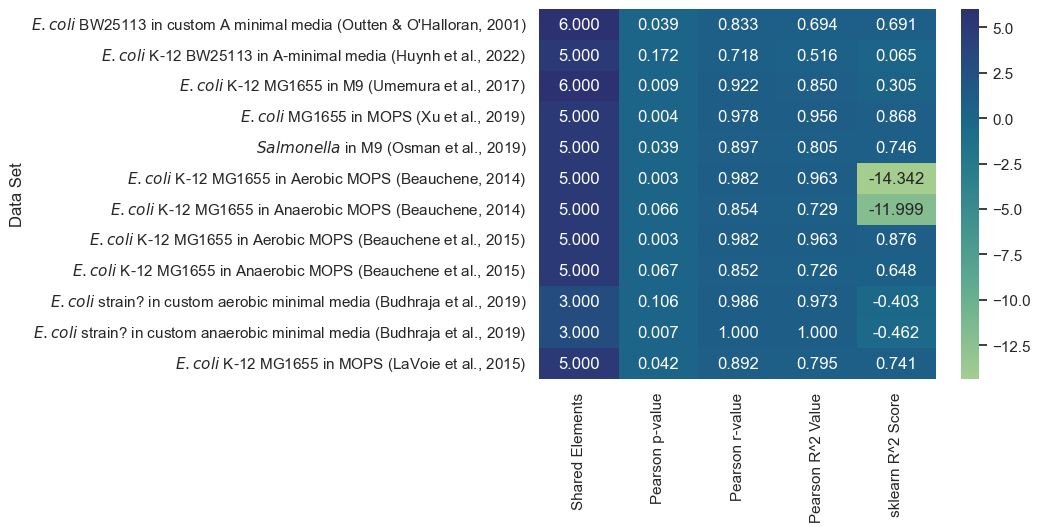

In [81]:
# Make a heatmap of the different correlation values:
MM_correlation_df = MM_correlation_df.to_pandas()
MM_correlation_df.set_index("Data Set", inplace=True)
sns.heatmap(MM_correlation_df, annot=True, fmt=".3f", cmap="crest")

# Plotting the data

In [82]:
# Custom color palettes (got colors from: https://seaborn.pydata.org/tutorial/color_palettes.html):
custom_palette1 = (sns.color_palette("tab10") + sns.color_palette("husl")[0:1] + sns.color_palette("Set2")[6:7]+ sns.color_palette("Paired")[0:1])  # adds coral and tan

custom_palette2 = (sns.color_palette("husl") + sns.color_palette("Set2")[5:6]) # adds yellow
# extra colors if needed: 
# sns.color_palette("husl")[6:7]) # adds light purple
# sns.color_palette("Set2")[5:6]) # adds yellow
# sns.color_palette("Set2")[1:2]) # adds light burnt orange
# sns.color_palette("Set2")[2:3]) # adds light periwinkle
# sns.color_palette("Set2")[6:7]) # adds tan
# sns.color_palette("Paired")[0:1]) # adds light blue

# note: it seems like when no palette is specified, the default is husl and the colors don't repeat at all!

# Marker styles (https://seaborn.pydata.org/tutorial/properties.html, https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers): 
# marker options: ["o", "s", "D", "X", "P", "v", "^", "<", ">", "1", "2", "3", "4", "8", "p", "P", "*", "h", "H", "+", "x", "d", "|", "_"]
# more options: [(4,1,0)), (8,1,0), (8,2,0) ] # (num sides, fill style, angle)

custom_markers1_SGT = [(4,2,45), (4,2,0)] # markers for the simulation and ground truth data
custom_markers1_exp = ["o", "^", "d", (4,0,45), "p", "h", "8", "P", (4,1,0)] # markers for the experimental data

custom_markers2_SGT = ["*", (8,1,0)] # markers for the simulation and ground truth data

custom_markers3_SGT = ["o","P"]
custom_markers3_exp = ["+",(4,2,45), "1", "2", "3", "4", (8,2,0), "x", (4,2,0)]

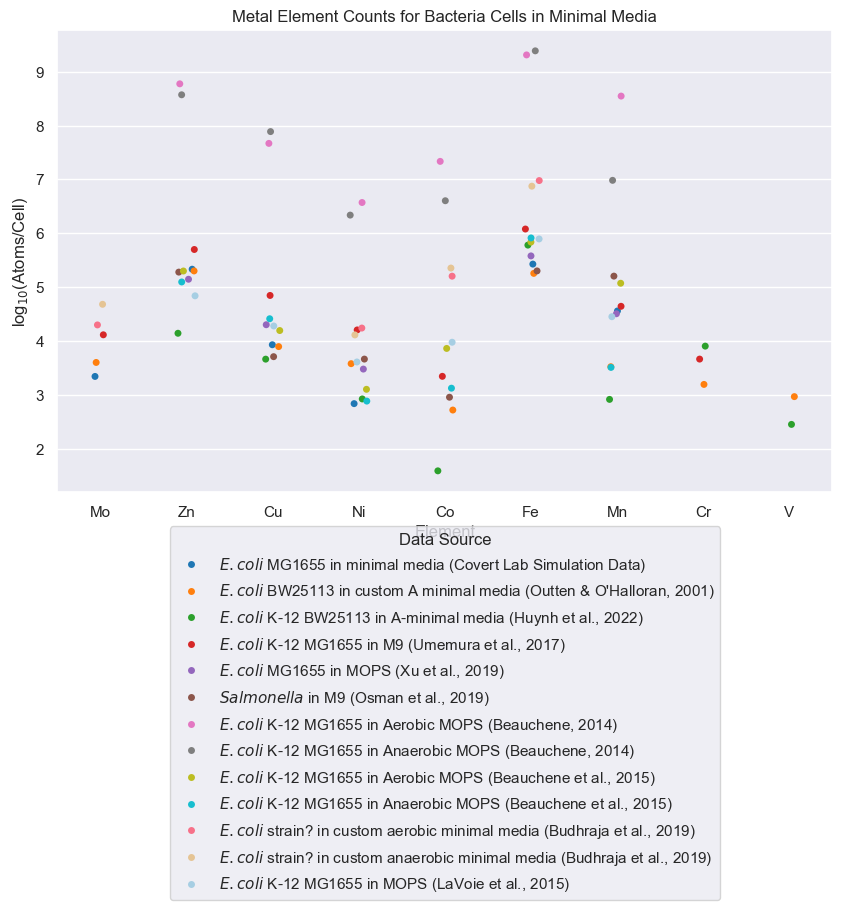

In [83]:
# Create the vertical strip plot
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_mm_long_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", palette=custom_palette1, jitter=True)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.9))
plt.title("Metal Element Counts for Bacteria Cells in Minimal Media")
plt.show()

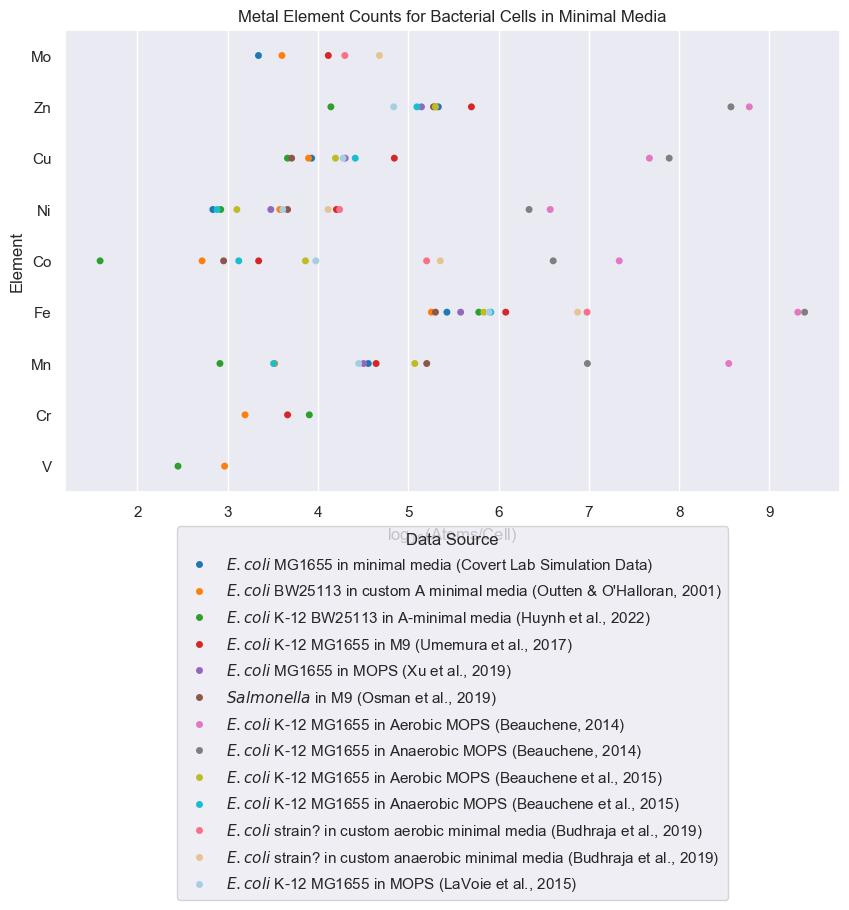

In [84]:
# create the horizontal stripplot:
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_mm_long_pd, x="log$_{10}$(Atoms/Cell)", y="Element", hue="Data Source", jitter=False, palette=custom_palette1,)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.9))
plt.title("Metal Element Counts for Bacterial Cells in Minimal Media")
plt.show()

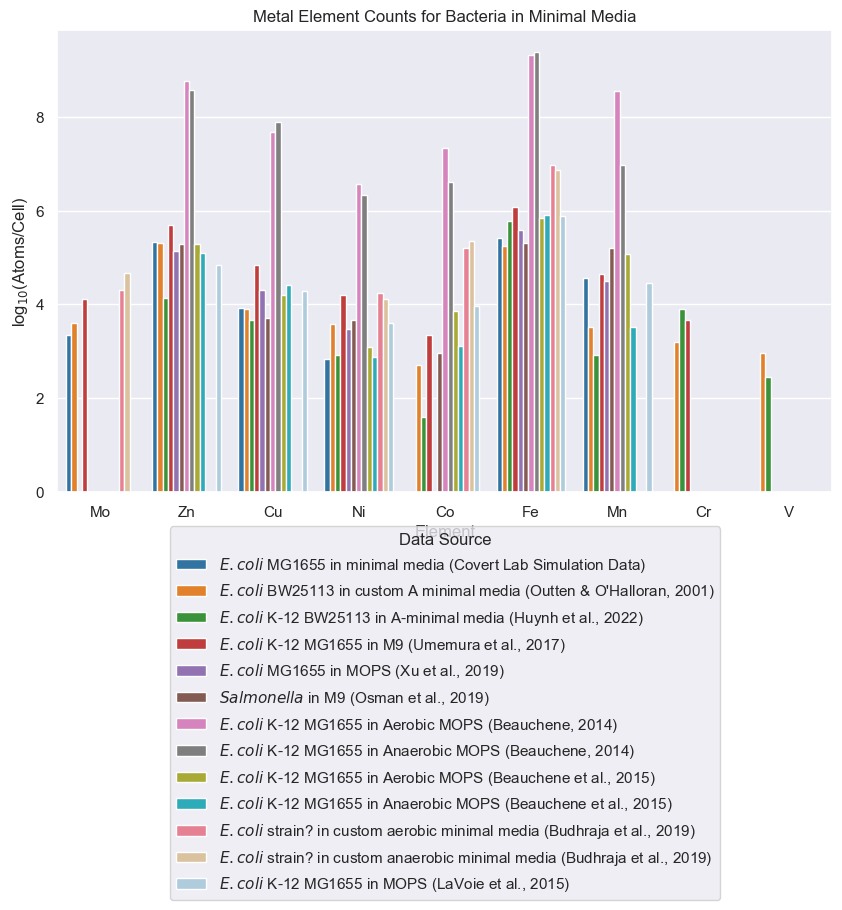

In [85]:
# create a bar plot of the metal counts data: 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_mm_long_pd, x="Element", y="log$_{10}$(Atoms/Cell)", hue="Data Source", palette=custom_palette1,)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.9))
plt.title("Metal Element Counts for Bacteria in Minimal Media")
plt.show() 

# plot with the median 

In [86]:
# todo ask cyrus if he knows an easier way to do this in polars
# Transpose the DF for sorting
mm_exp_dataT = mm_exp_data.drop("Element")
mm_exp_dataT = mm_exp_dataT.transpose(include_header=True, header_name="Source", column_names=mm_exp_data.get_column("Element"))

# calculate the median for each column:
# could also probably use: lb_exp_dataT.select(pl.median("Mo"))
Mo_median = mm_exp_dataT.select("Mo").median()
Zn_median = mm_exp_dataT.select("Zn").median()
Cu_median = mm_exp_dataT.select("Cu").median()
Co_median = mm_exp_dataT.select("Co").median()
Ni_median = mm_exp_dataT.select("Ni").median()
Fe_median = mm_exp_dataT.select("Fe").median()
Mn_median = mm_exp_dataT.select("Mn").median()
Cr_median = mm_exp_dataT.select("Cr").median()
V_median = mm_exp_dataT.select("V").median()

medians_mm = [Mo_median.item(), Zn_median.item(), Cu_median.item(), Ni_median.item(), Co_median.item(), Fe_median.item(), Mn_median.item(), Cr_median.item(), V_median.item()]

# next, have to manually add this back to the original data frame, sort it, then drop the medians column

# create df with medians 
medians_mm_df = pl.DataFrame({
    "Element": ["Mo", "Zn", "Cu", "Ni", "Co", "Fe", "Mn", "Cr", "V"],
    "Median": medians_mm})

long_medians_mm = medians_mm_df.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")
long_medians_mm_pd = long_medians_mm.to_pandas()

# join the medians df with the original data frame! 
mm_exp_data_with_medians = mm_exp_data.join(medians_mm_df, on="Element", how="left", coalesce=True)

# sort by the median column
mm_exp_data_sorted_medians = mm_exp_data_with_medians.sort("Median", descending=True)

# drop the median column
mm_exp_data_sorted_medians = mm_exp_data_sorted_medians.drop("Median")

# reshape the data for graphs
df_long_medians_mm = mm_exp_data_sorted_medians.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")
df_long_medians_mm_pd = df_long_medians_mm.to_pandas()

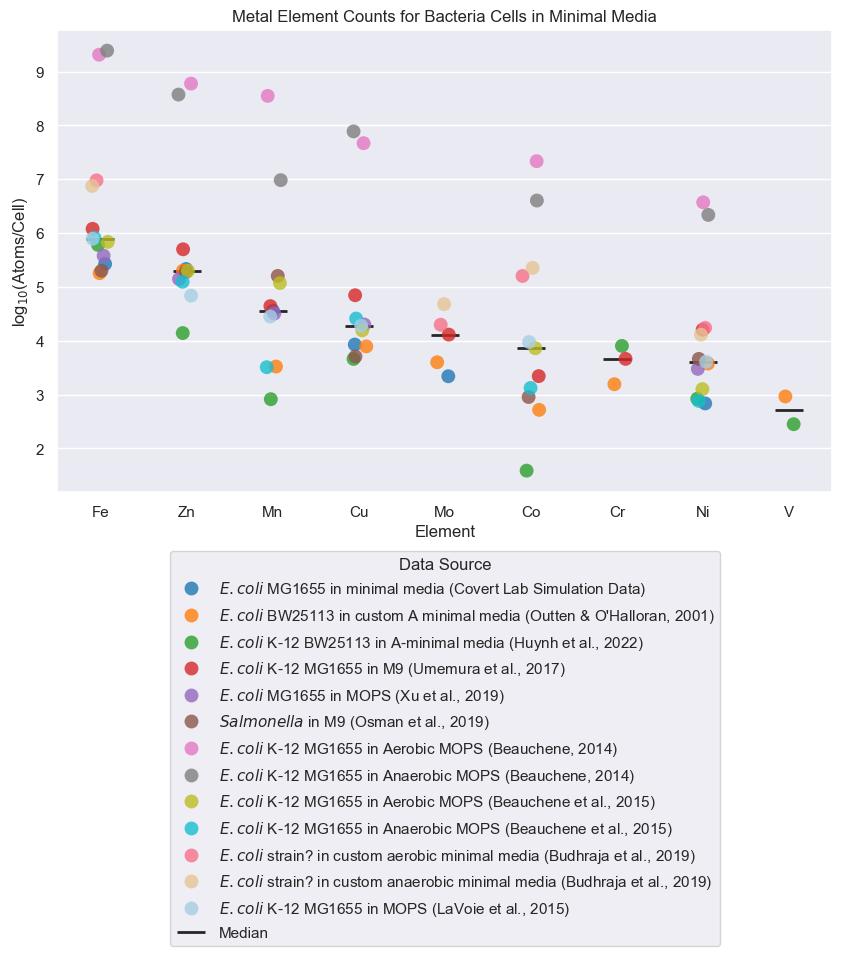

In [87]:
# Create the vertical strip plot
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", jitter=True, size=10, alpha=.8, palette=custom_palette1,)

# add a small marker at the median value of each element: 
ax = sns.pointplot(
     data=long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", linestyle="none", errorbar=None,
     marker="_", markersize=20, markeredgewidth=2, palette='dark:black')

sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -1))
plt.title("Metal Element Counts for Bacteria Cells in Minimal Media")
plt.show()

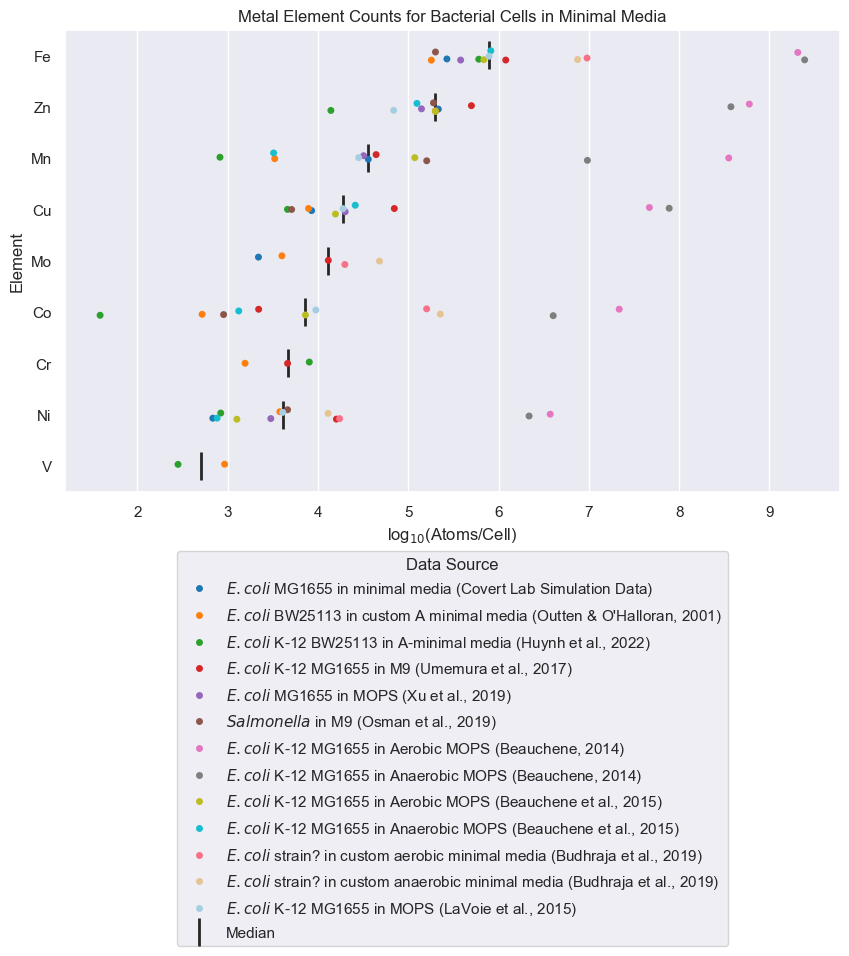

In [88]:
# create the horizontal stripplot:
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_long_medians_mm_pd, x="log$_{10}$(Atoms/Cell)", y="Element", hue="Data Source", jitter=True, palette=custom_palette1,)

# add a small marker at the median value of each element: 
ax = sns.pointplot(data=long_medians_mm_pd, x="log$_{10}$(Atoms/Cell)", y="Element", hue="Data Source", linestyle="none", errorbar=None, marker="|", markersize=20, markeredgewidth=2, palette='dark:black')

sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -1))
plt.title("Metal Element Counts for Bacterial Cells in Minimal Media")
plt.show()

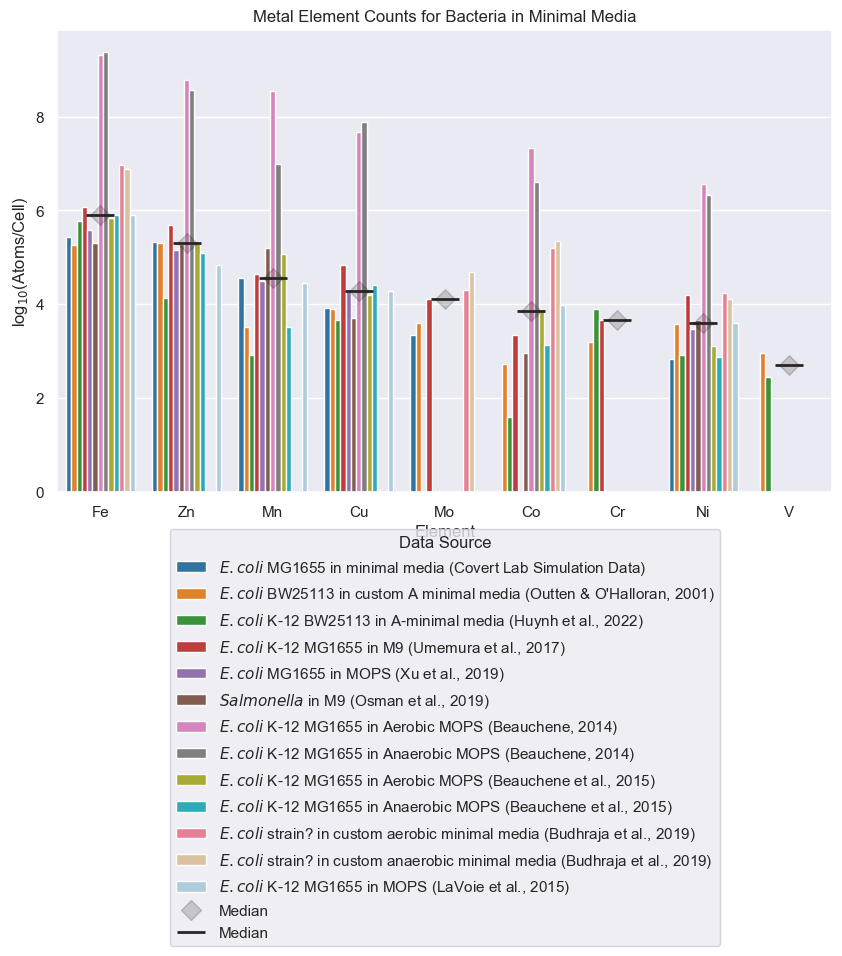

In [89]:
# create a bar plot of the metal counts data: 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_long_medians_mm_pd, x="Element", y="log$_{10}$(Atoms/Cell)", hue="Data Source", palette=custom_palette1)


# plot the median values for each element:
ax = sns.stripplot(data=long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", jitter=False, s=10, marker="D", linewidth=1, alpha=.2, palette="dark:red")

# plot the median values for each element:
ax = sns.pointplot(
     data=long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", linestyle="none", errorbar=None,
     marker="_", markersize=20, markeredgewidth=2, palette='dark:black')


sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -1))
plt.title("Metal Element Counts for Bacteria in Minimal Media")
plt.show()

## template

Media type:  media

Bacterial species:

Units used in calculations:

QUESTIONS/ISSUES:

# fold change

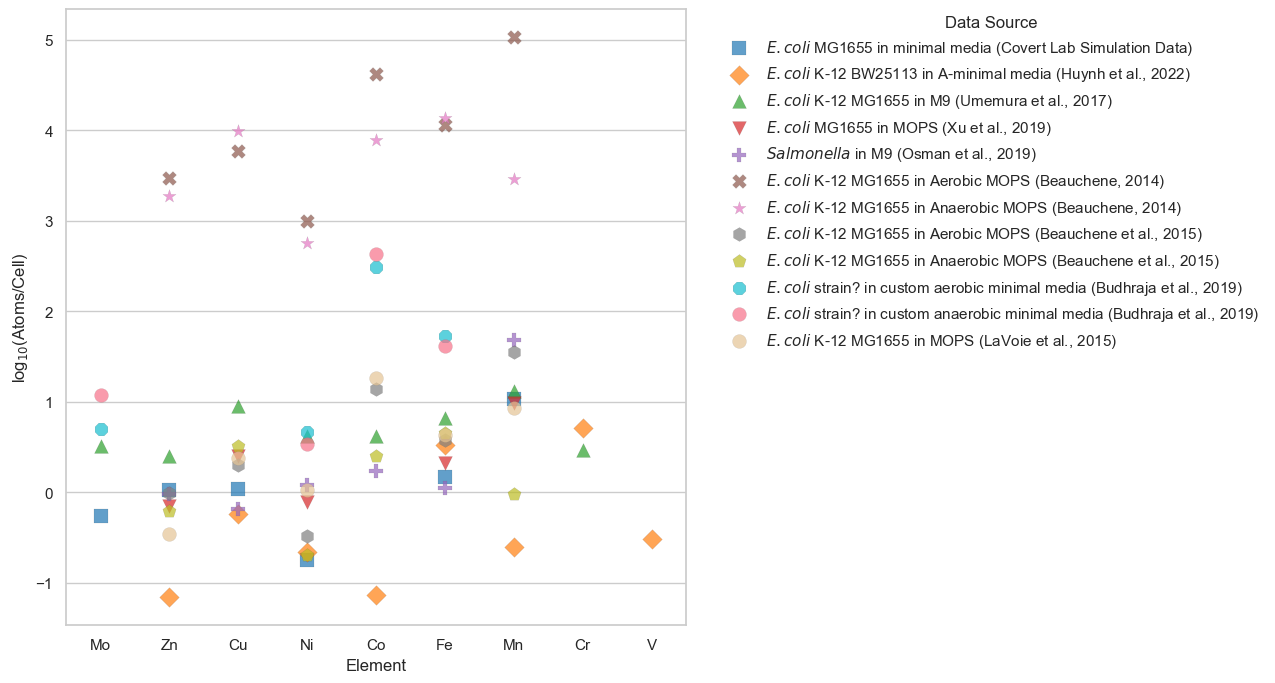

In [90]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 8})
sns.set(style="whitegrid", palette="Set2", context="notebook")

marker_styles = ['s', 'D', '^', 'v', 'P', 'X', '*', 'h', 'p', "8", "o", "o", ]  # Customize as needed
#grey_palette3 = ["#B0B0B0"] * len(marker_styles)

# Column to divide by
oo_col = "$\t{E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)"

# Create a list of expressions for fold change (excluding 'Element' and the OO column)
fold_change_exprs = [
    (pl.col(col) - pl.col(oo_col)).alias(f"{col}")
    for col in mm_exp_data.columns
    if col not in ["Element", oo_col]]

# Apply the expressions to mm_exp_data using select
mm_comparison_data_fold_change = mm_exp_data.select(
    [pl.col("Element")] + fold_change_exprs)

# Edit dataframe format for plotting
mm_comparison_data_fold_change_long = mm_comparison_data_fold_change.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_comparison_data_fold_change_pd = mm_comparison_data_fold_change_long.to_pandas()

# plot the fold change data:
plt.figure(figsize=(8, 8))

for i, (data_source, marker) in enumerate(zip(mm_comparison_data_fold_change_pd["Data Source"].unique(), marker_styles)):
    subset = mm_comparison_data_fold_change_pd[mm_comparison_data_fold_change_pd["Data Source"] == data_source]
    sns.stripplot(
        data=subset, y="log$_{10}$(Atoms/Cell)", x="Element", color=custom_palette1[i], marker=marker,
        s=10, linewidth=0.1, alpha=0.7, jitter=True, label=data_source)

# get rid of duplicate legend entries:
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
handles = list(unique.values())
labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")





Same plot as above but discarding the data that is typically mjore than 1.5 times greater

So brown crosses (Beauchene 2014), pink stars (beauchene 2014), and then just the Co element in general since I do not have covert lab data for that 


In [91]:
# todo ask cyrus if that is ok to take Co out 


Text(0.5, 1.0, "Fold Change of Metal Element Counts for Bacteria Cells in Minimal Media \n compared to Outten & O'Halloran, 2001")

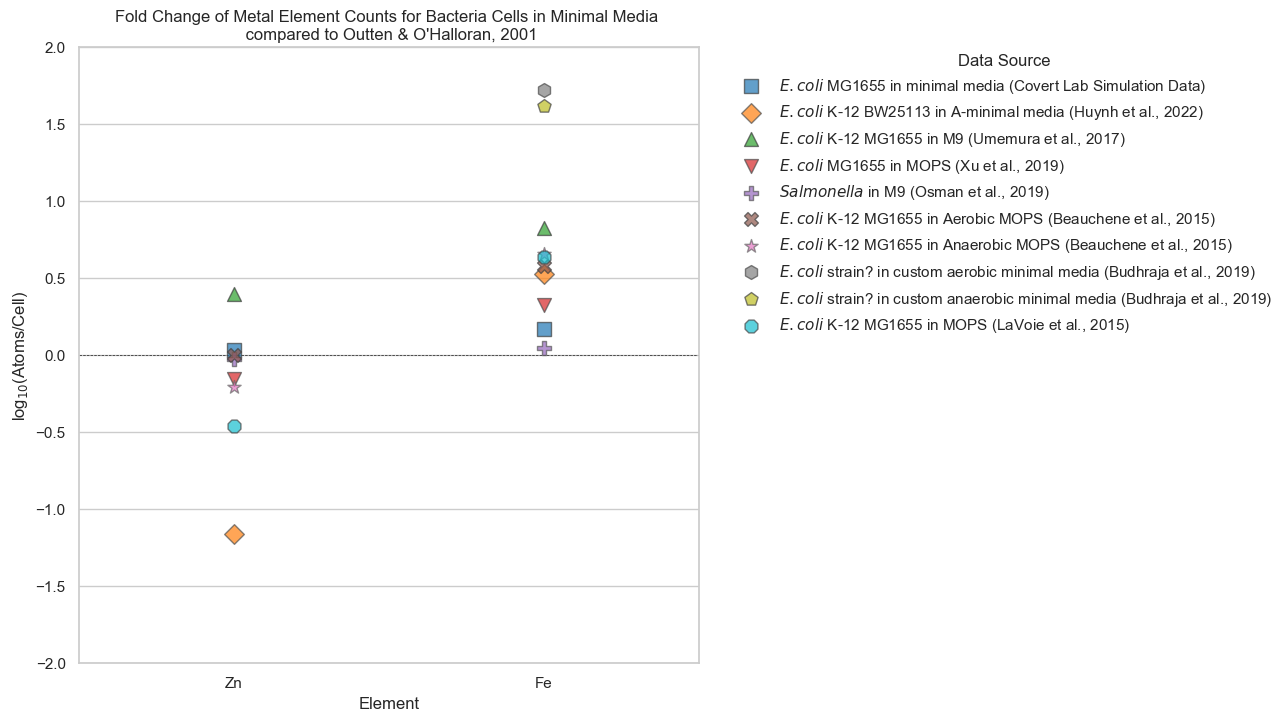

In [92]:
# discard data that appears quite larger
mm_fold_change_discarded = mm_comparison_data_fold_change.drop(["$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"])

mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Co")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "V")     
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Cr")     
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Mn")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Cu")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Mo")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Ni")

# Edit dataframe format for plotting
mm_fold_change_discarded = mm_fold_change_discarded.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_fold_change_discarded_pd = mm_fold_change_discarded.to_pandas()

# plot the fold change data:
plt.figure(figsize=(8, 8))

for i, (data_source, marker) in enumerate(zip(mm_fold_change_discarded_pd["Data Source"].unique(), marker_styles)):
    subset = mm_fold_change_discarded_pd[mm_fold_change_discarded_pd["Data Source"] == data_source]
    sns.stripplot(
        data=subset, y="log$_{10}$(Atoms/Cell)", x="Element", color=custom_palette1[i], marker=marker,
        s=10, linewidth=1, alpha=0.7, jitter=True, label=data_source,)
    
# make a dark line at 1 
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)

# get rid of duplicate legend entries:
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
handles = list(unique.values())
labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")
plt.ylim([-2, 2])
plt.title("Fold Change of Metal Element Counts for Bacteria Cells in Minimal Media \n compared to Outten & O'Halloran, 2001")


Text(0.5, 1.0, "Fold Change of Metal Element Counts for Bacteria Cells in Minimal Media \n compared to Outten & O'Halloran, 2001")

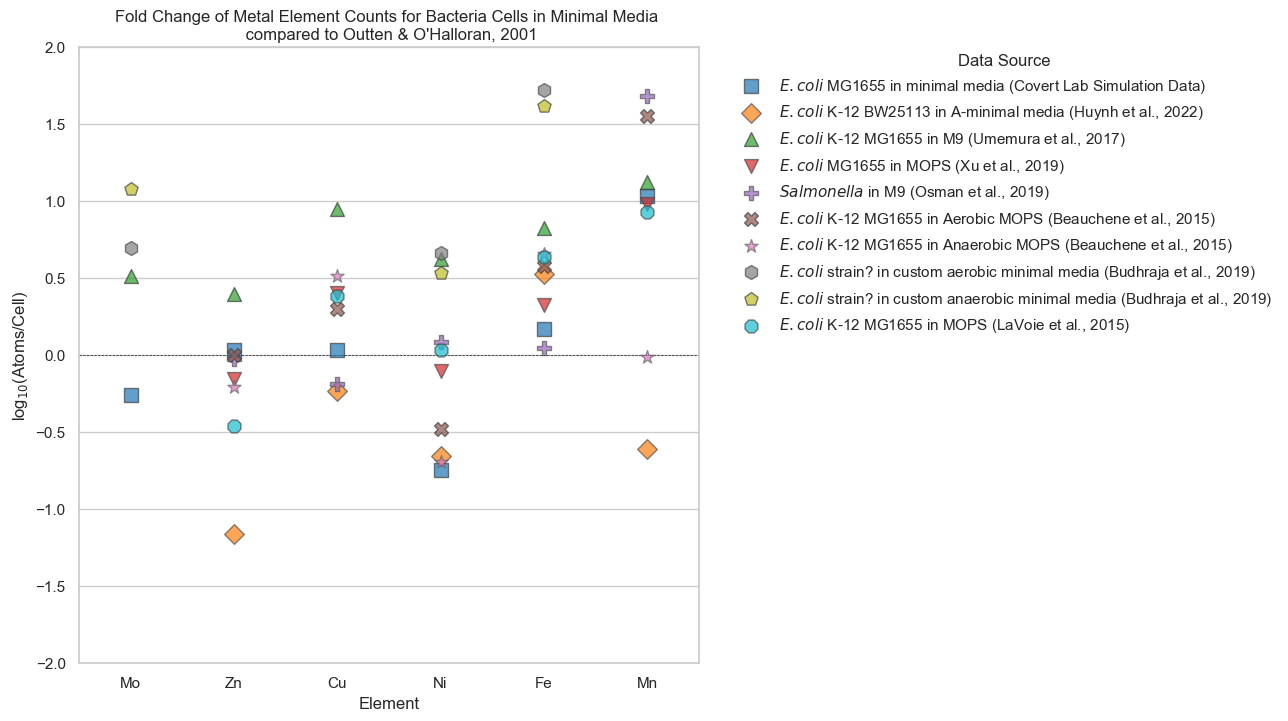

In [93]:
# discard data that appears quite larger
mm_fold_change_discarded = mm_comparison_data_fold_change.drop(["$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"])

mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Co")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "V")     
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Cr")     


# Edit dataframe format for plotting
mm_fold_change_discarded = mm_fold_change_discarded.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_fold_change_discarded_pd = mm_fold_change_discarded.to_pandas()

# plot the fold change data:
plt.figure(figsize=(8, 8))

for i, (data_source, marker) in enumerate(zip(mm_fold_change_discarded_pd["Data Source"].unique(), marker_styles)):
    subset = mm_fold_change_discarded_pd[mm_fold_change_discarded_pd["Data Source"] == data_source]
    sns.stripplot(
        data=subset, y="log$_{10}$(Atoms/Cell)", x="Element", color=custom_palette1[i], marker=marker,
        s=10, linewidth=1, alpha=0.7, jitter=True, label=data_source,)
    
# make a dark line at 1 
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)

# get rid of duplicate legend entries:
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
handles = list(unique.values())
labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")
plt.ylim([-2, 2])
plt.title("Fold Change of Metal Element Counts for Bacteria Cells in Minimal Media \n compared to Outten & O'Halloran, 2001")


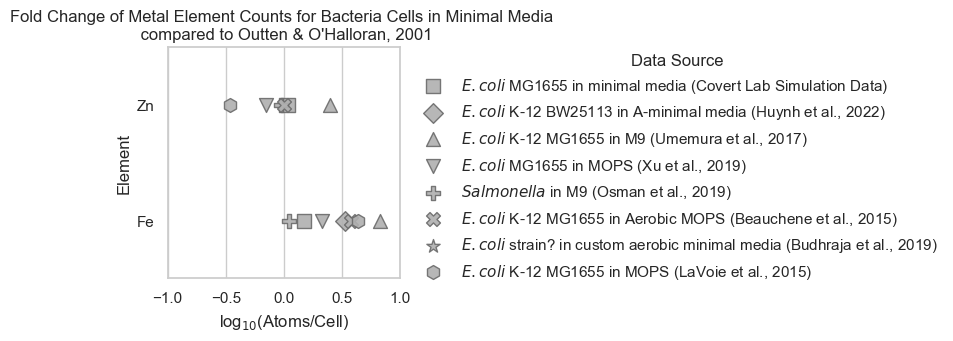

In [94]:
# discard data that appears quite larger
mm_fold_change_discarded = mm_comparison_data_fold_change.drop(["$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)", "$\t{E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"])

mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Co")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "V")     
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Cr")     
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Mn")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Cu")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Mo")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Ni")

# make new palettes: 
color_palette4 = sns.color_palette("Set2")
grey_palette3 = ["#B0B0B0"] * len(mm_fold_change_discarded.columns)


# Edit dataframe format for plotting
mm_fold_change_discarded = mm_fold_change_discarded.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_fold_change_discarded_pd = mm_fold_change_discarded.to_pandas()

# plot the fold change data:
plt.figure(figsize=(3, 3))

for i, (data_source, marker) in enumerate(zip(mm_fold_change_discarded_pd["Data Source"].unique(), marker_styles)):
    subset = mm_fold_change_discarded_pd[mm_fold_change_discarded_pd["Data Source"] == data_source]
    sns.stripplot(
        data=subset, x="log$_{10}$(Atoms/Cell)", y="Element", color=grey_palette3[i], marker=marker,
        s=10, linewidth=1, alpha=0.9, jitter=True, label=data_source,)
    


# get rid of duplicate legend entries:
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
handles = list(unique.values())
labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")
plt.xlim([-1, 1])
plt.title("Fold Change of Metal Element Counts for Bacteria Cells in Minimal Media \n compared to Outten & O'Halloran, 2001")

plt.savefig("Fold_change_minimal_media_grey.svg", bbox_inches='tight')

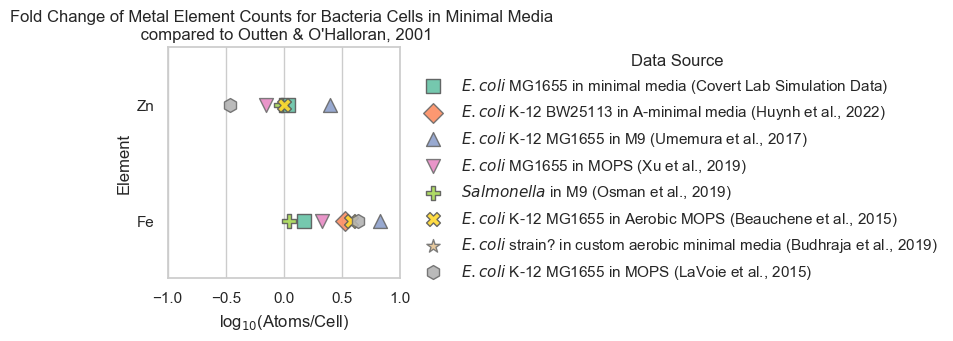

In [95]:
# discard data that appears quite larger
mm_fold_change_discarded = mm_comparison_data_fold_change.drop(["$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)", "$\t{E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"])

mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Co")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "V")     
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Cr")     
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Mn")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Cu")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Mo")
mm_fold_change_discarded = mm_fold_change_discarded.filter(pl.col("Element") != "Ni")

# make new palettes: 
color_palette4 = sns.color_palette("Set2")

# Edit dataframe format for plotting
mm_fold_change_discarded = mm_fold_change_discarded.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_fold_change_discarded_pd = mm_fold_change_discarded.to_pandas()

# plot the fold change data:
plt.figure(figsize=(3, 3))

for i, (data_source, marker) in enumerate(zip(mm_fold_change_discarded_pd["Data Source"].unique(), marker_styles)):
    subset = mm_fold_change_discarded_pd[mm_fold_change_discarded_pd["Data Source"] == data_source]
    sns.stripplot(
        data=subset, x="log$_{10}$(Atoms/Cell)", y="Element", color=color_palette4[i], marker=marker,
        s=10, linewidth=1, alpha=0.9, jitter=True, label=data_source,)
    


# get rid of duplicate legend entries:
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
handles = list(unique.values())
labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")
plt.xlim([-1, 1])
plt.title("Fold Change of Metal Element Counts for Bacteria Cells in Minimal Media \n compared to Outten & O'Halloran, 2001")

plt.savefig("Fold_change_minimal_media_set2.svg", bbox_inches='tight')

# Normal counts graph of all elements
requested 05/20/25

In [96]:
# rename the saving path: 




In [97]:
mm_exp_data

Element,$ {E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data),"$ {E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)","$ {E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)","$ {E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)","$ {E. coli}$ MG1655 in MOPS (Xu et al., 2019)","$ {Salmonella}$ in M9 (Osman et al., 2019)","$ {E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)","$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)","$ {E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene et al., 2015)","$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)","$ {E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)","$ {E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)","$ {E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Mo""",3.340453,3.600246,null,4.113943,null,null,null,null,null,null,4.297533,4.680697,null
"""Zn""",5.332476,5.300613,4.142433,5.69897,5.146128,5.278754,8.776804,8.573211,5.299419,5.095701,null,null,4.838275
"""Cu""",3.929124,3.894907,3.661721,4.845098,4.30103,3.70757,7.670326,7.889502,4.193258,4.412285,null,null,4.277628
"""Ni""",2.835108,3.577501,2.922465,4.20412,3.477121,3.662758,6.571822,6.337739,3.10106,2.882338,4.239478,4.111756,3.609164
"""Co""",null,2.716067,1.586481,3.342423,null,2.954243,7.335966,6.604812,3.860641,3.122211,5.203193,5.354136,3.975741
"""Fe""",5.427483,5.25522,5.780415,6.079181,5.579784,5.30103,9.313996,9.389767,5.836669,5.91357,6.979681,6.875181,5.894879
"""Mn""",4.556902,3.520492,2.913947,4.643453,4.50515,5.20412,8.549111,6.983752,5.071949,3.508215,null,null,4.450135
"""Cr""",null,3.192079,3.903579,3.662758,null,null,null,null,null,null,null,null,null
"""V""",null,2.96536,2.449304,null,null,null,null,null,null,null,null,null,null


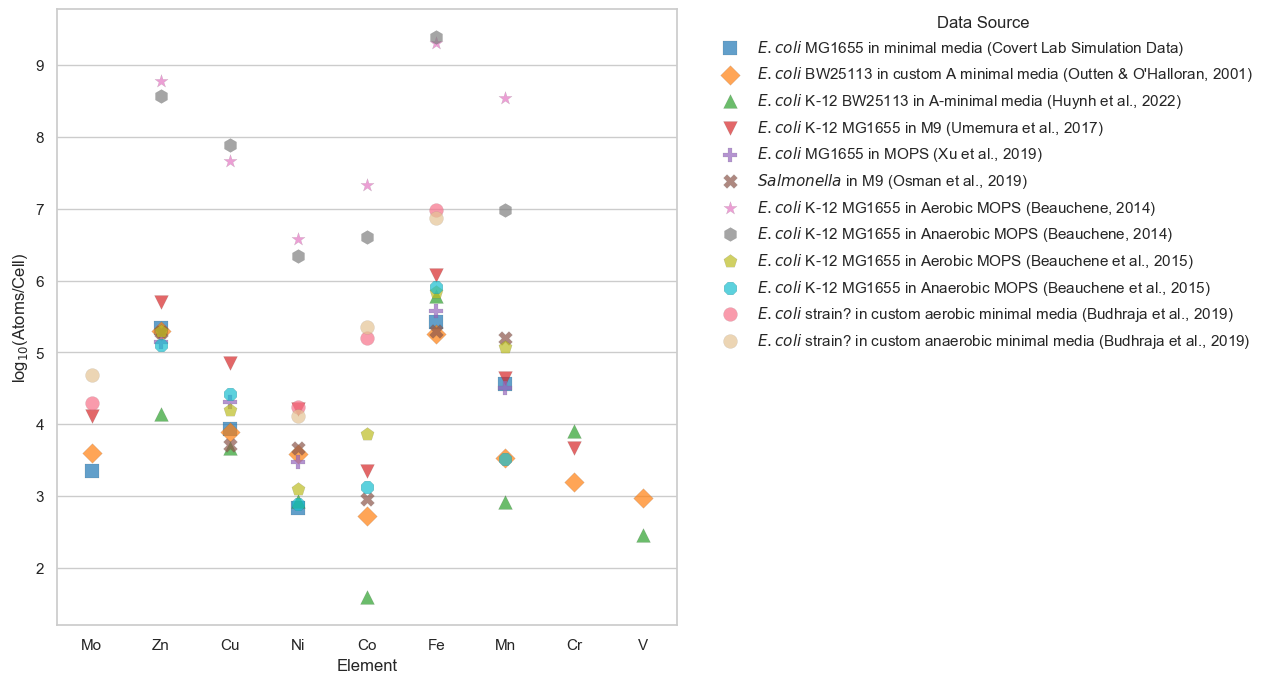

In [98]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 8})
sns.set(style="whitegrid", palette="Set2", context="notebook")

marker_styles = ['s', 'D', '^', 'v', 'P', 'X', '*', 'h', 'p', "8", "o", "o", ]  # Customize as needed
#grey_palette3 = ["#B0B0B0"] * len(marker_styles)


# Edit dataframe format for plotting
mm_comparison_plot_data = mm_exp_data.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_comparison_plot_data_pd = mm_comparison_plot_data.to_pandas()

# plot the fold change data:
plt.figure(figsize=(8, 8))

for i, (data_source, marker) in enumerate(zip(mm_comparison_plot_data_pd["Data Source"].unique(), marker_styles)):
    subset = mm_comparison_plot_data_pd[mm_comparison_plot_data_pd["Data Source"] == data_source]
    sns.stripplot(
        data=subset, y="log$_{10}$(Atoms/Cell)", x="Element", color=custom_palette1[i], marker=marker,
        s=10, linewidth=0.1, alpha=0.7, jitter=True, label=data_source)

# get rid of duplicate legend entries:
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
handles = list(unique.values())
labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")





nothing discarded:

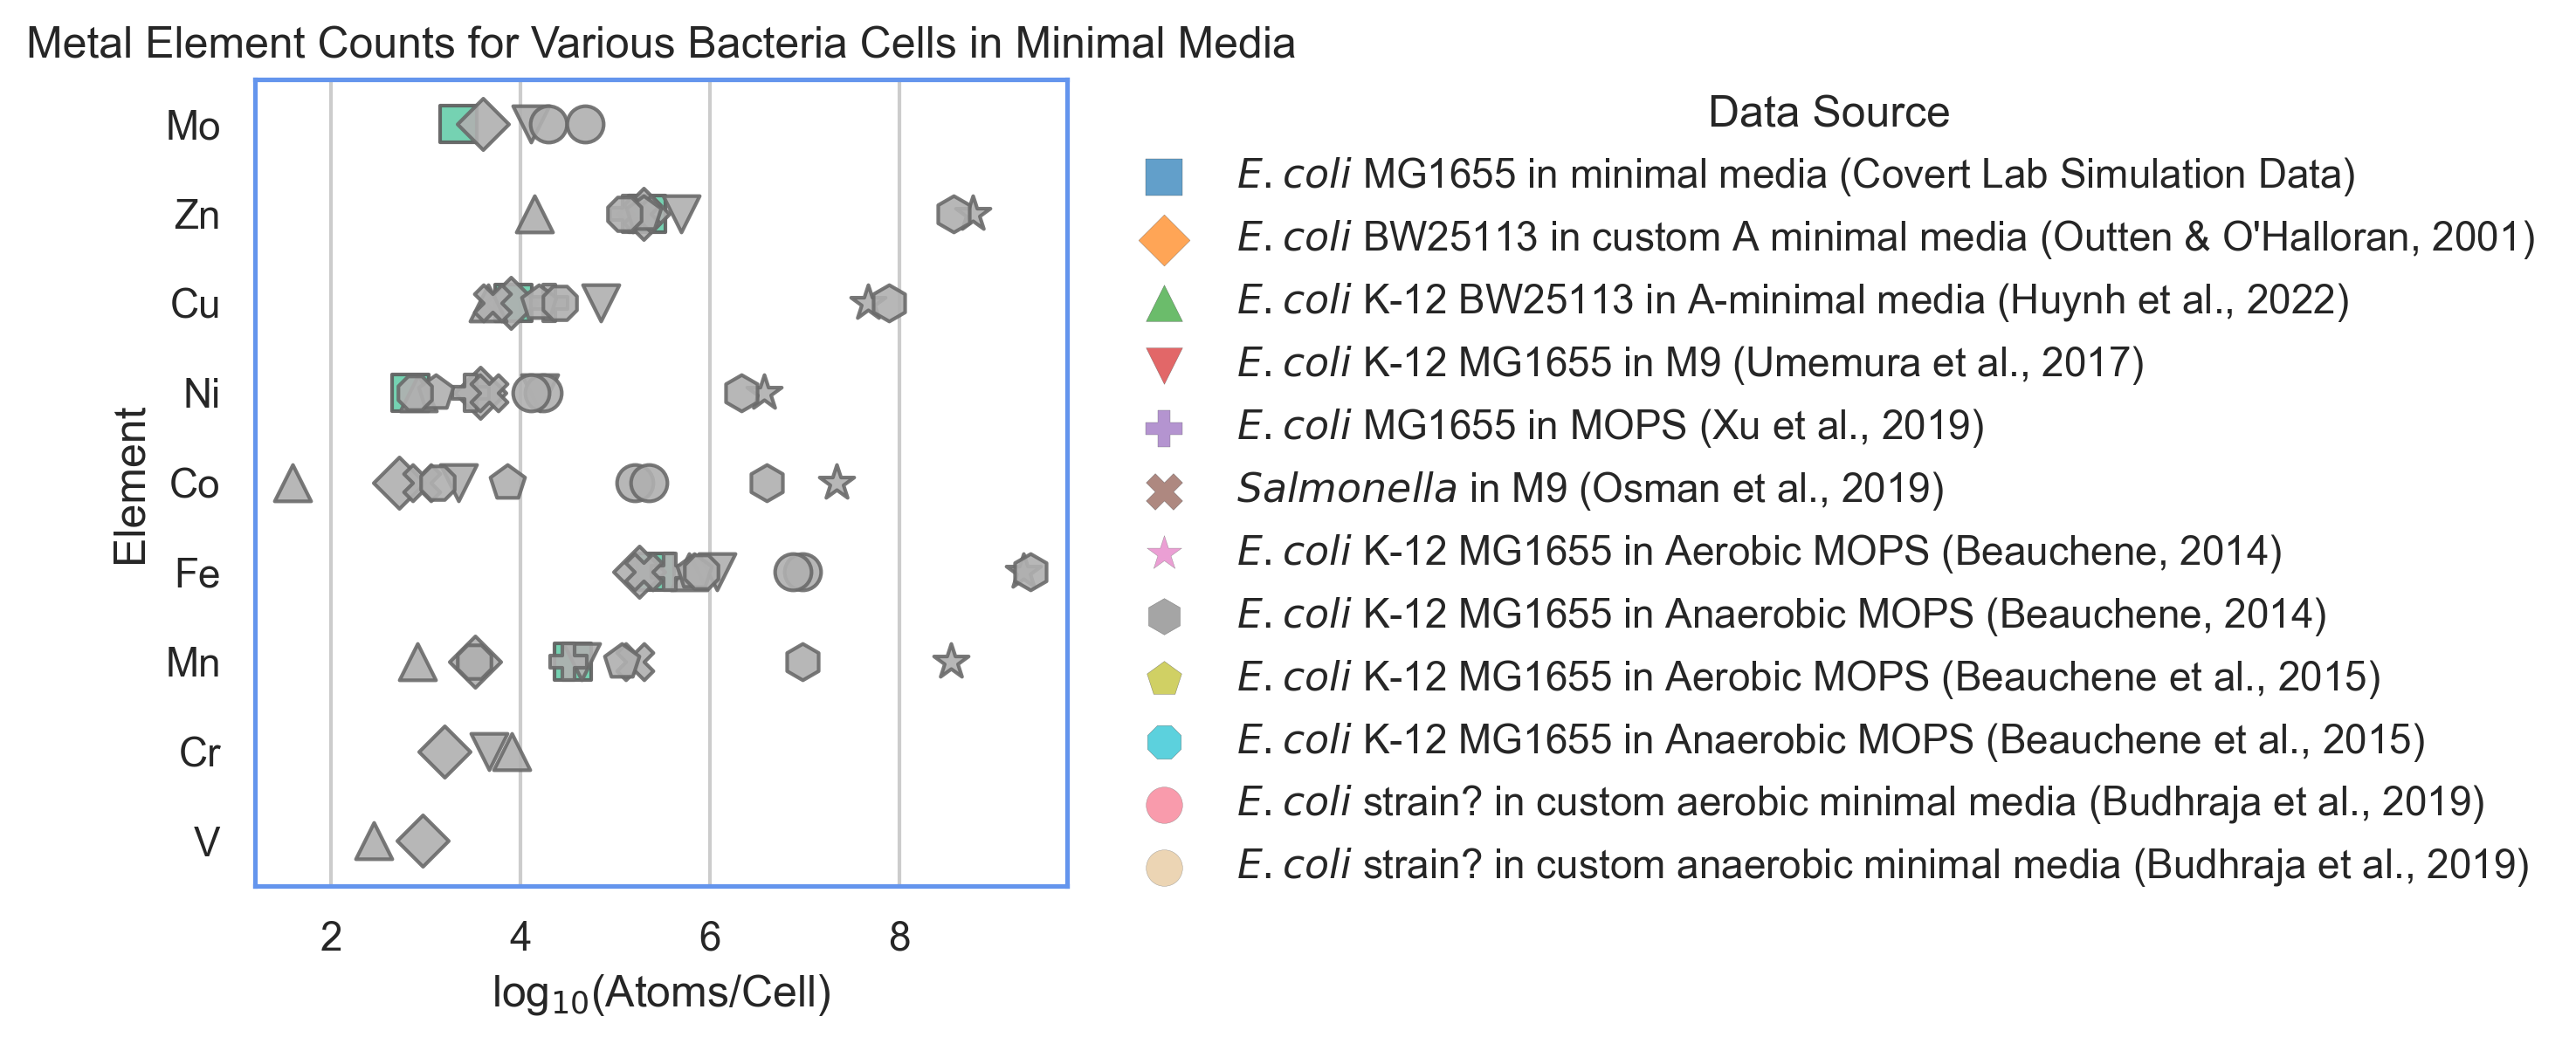

In [99]:
# make new palettes: 
color_palette4 = sns.color_palette("Set2")
grey_palette3 = ["#B0B0B0"] * len(mm_exp_data.columns)


# Edit dataframe format for plotting
mm_exp_data_for_plot = mm_exp_data.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_exp_data_pd = mm_exp_data_for_plot.to_pandas()

# plot the fold change data:
plt.figure(figsize=(4, 4), dpi=300)
marker_styles = ['s', 'D', '^', 'v', 'P', 'X', '*', 'h', 'p', "8", "o", "o", ]  # Customize as needed


for i, (data_source, marker) in enumerate(zip(mm_exp_data_pd["Data Source"].unique(), marker_styles)):
    subset = mm_exp_data_pd[mm_exp_data_pd["Data Source"] == data_source]
    if data_source == "$\t{E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)":
        c = "mediumaquamarine"
    else:
        c = grey_palette3[i]
    sns.stripplot(
        data=subset, x="log$_{10}$(Atoms/Cell)", y="Element", color=c, marker=marker,
        s=10, linewidth=1, alpha=0.9, jitter=True, label=data_source,)
    

# for some reason, without this, the legend does not show all entries sometimes
# handles, labels = plt.gca().get_legend_handles_labels()
# unique = dict(zip(labels, handles))
# handles = list(unique.values())
# labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")
#plt.xlim([-1, 1])
plt.title("Metal Element Counts for Various Bacteria Cells in Minimal Media")
for spine in plt.gca().spines.values():
    spine.set_edgecolor("cornflowerblue")

save_path = os.path.expanduser('~/vEcoli/notebooks/mia_notebooks/metal_count_data/MM_metal_count_comparisons/')
# make the directory if it does not exist:
os.makedirs(save_path, exist_ok=True)
plt.savefig(save_path+"metal_counts_in_minimal_media_grey_all_data.svg", bbox_inches='tight')

Edit to make a bit cleaner

/var/folders/fg/mh5y1dgn2n5ft000p664m2z80000gq/T/ipykernel_34679/4090156904.py:16: DeprecationWarning: `map_dict` is deprecated. It has been renamed to `replace`. The default behavior has changed to keep any values not present in the mapping unchanged. Pass `default=None` to keep existing behavior.
  pl.col("Element").map_dict(element_order_map).alias("element_sort_order"))


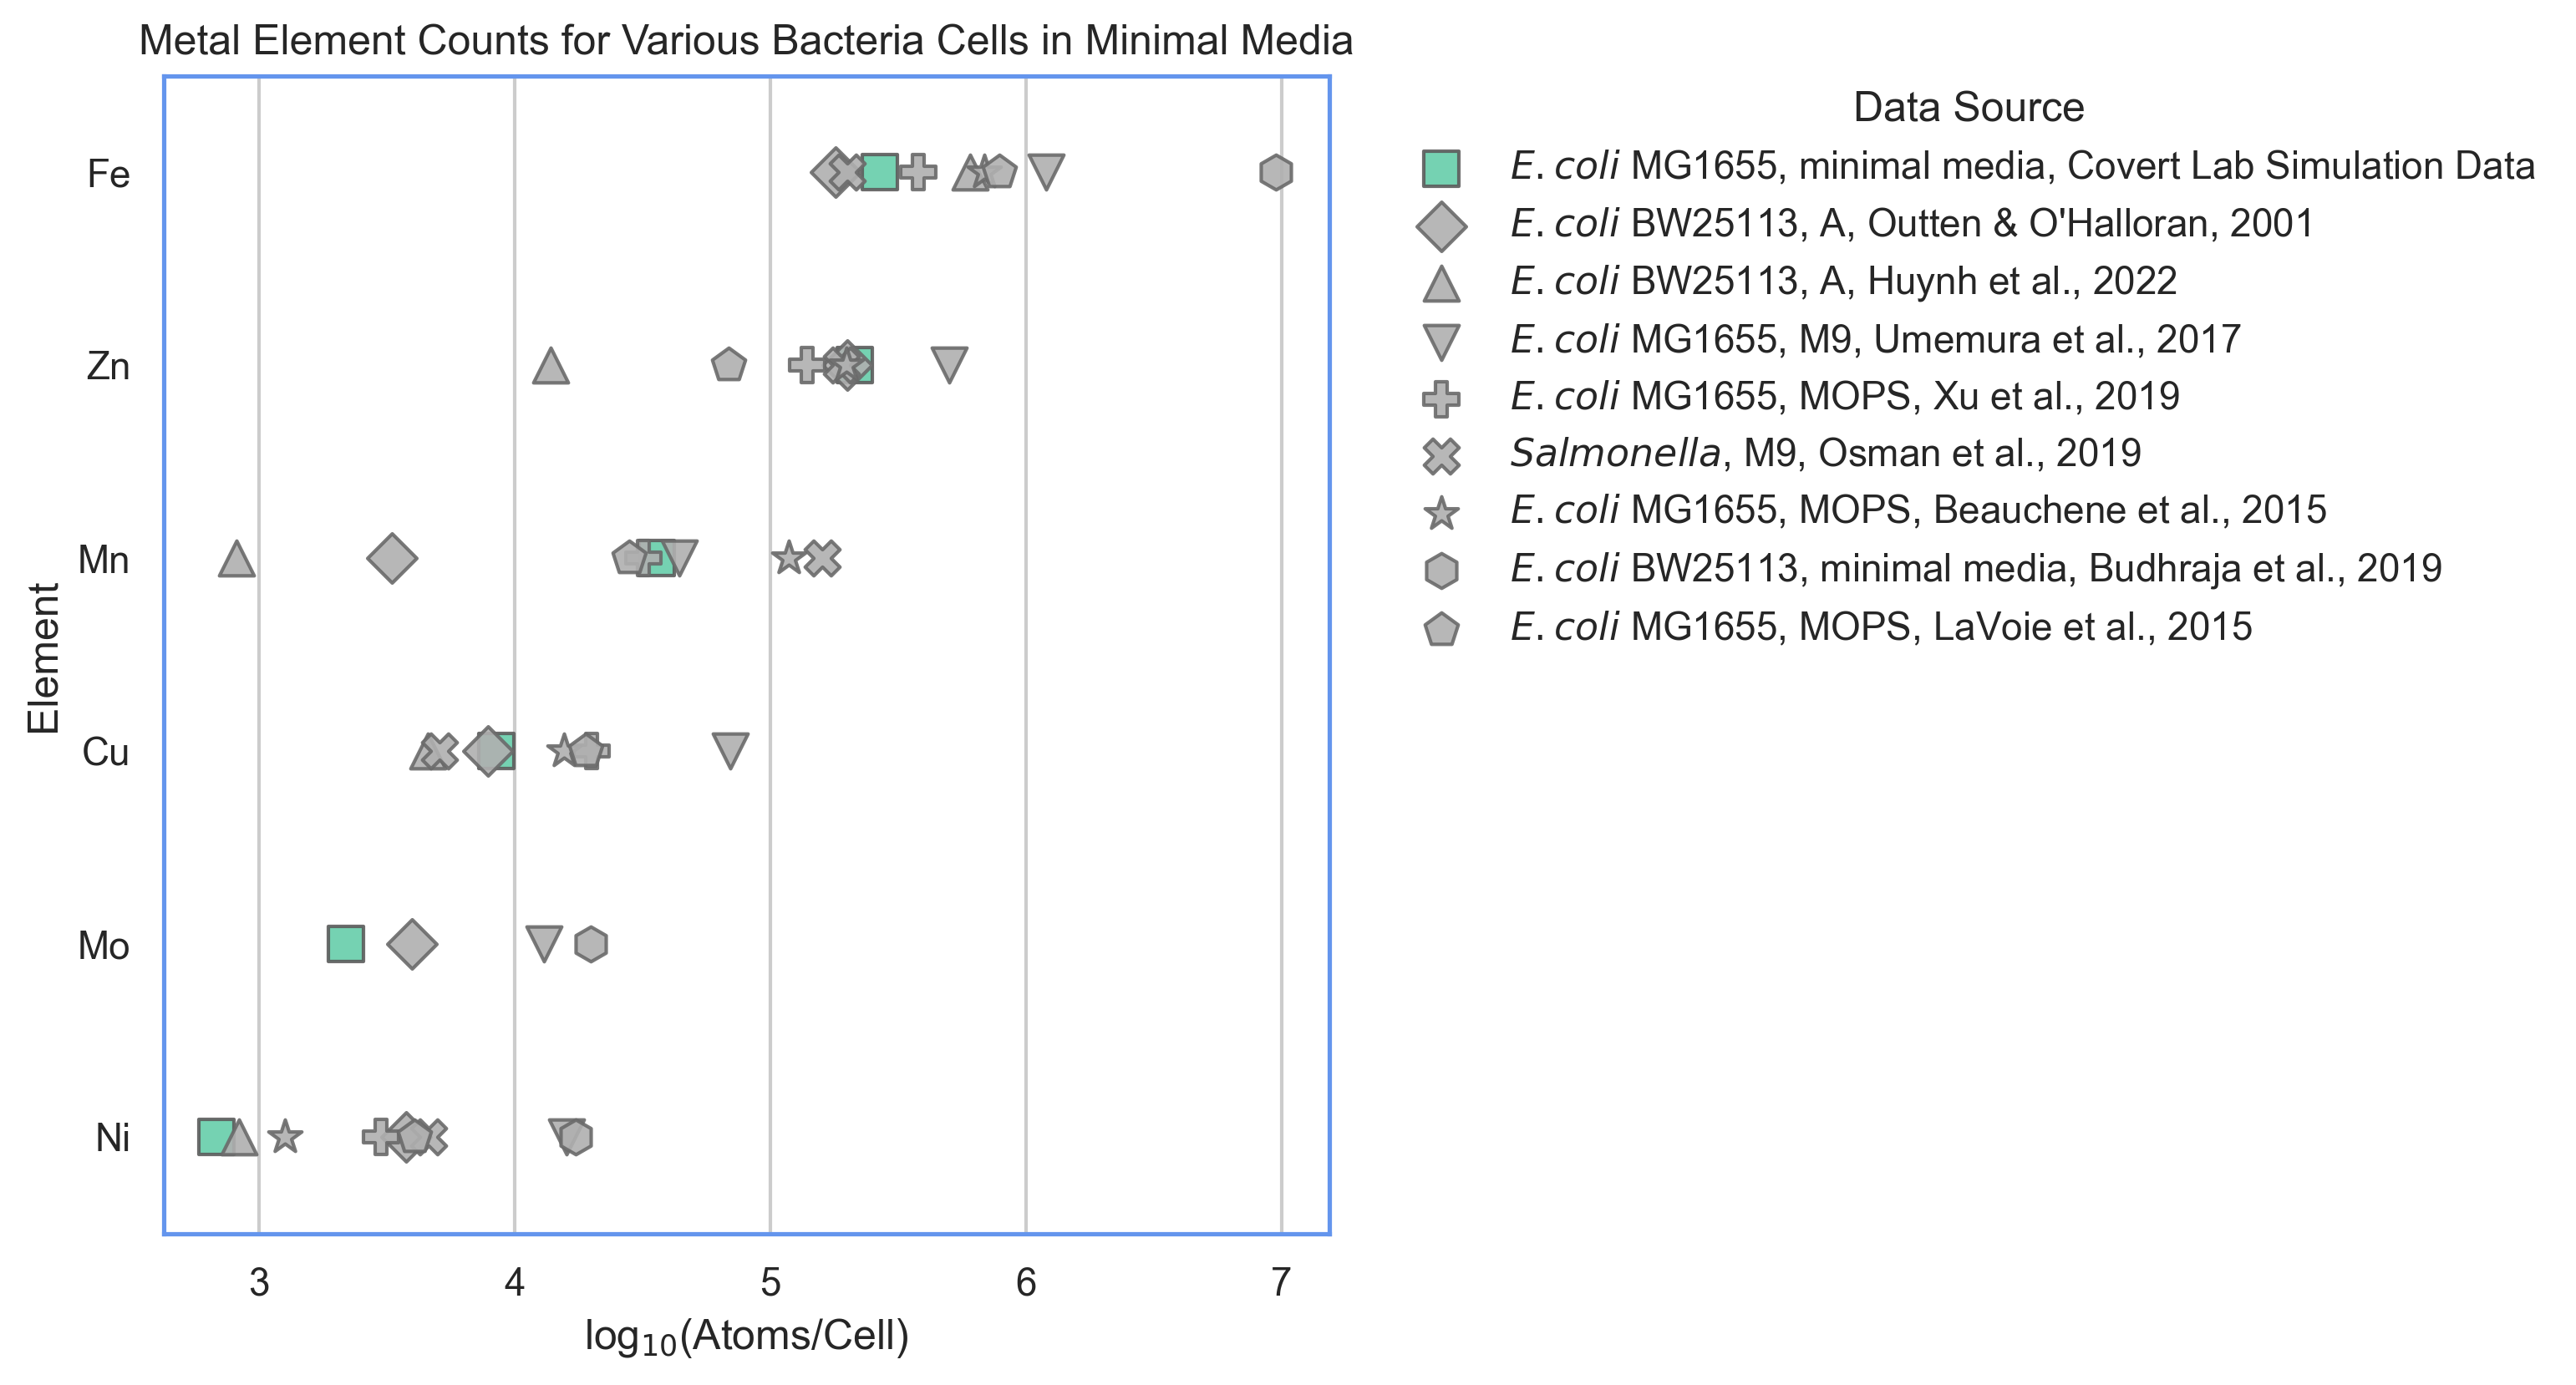

In [103]:
# discard data that appears quite larger
mm_exp_data_discarded = mm_exp_data.drop(["$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene et al., 2015)", "$\t{E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"])

mm_exp_data_discarded = mm_exp_data_discarded.filter(pl.col("Element") != "Co")
mm_exp_data_discarded = mm_exp_data_discarded.filter(pl.col("Element") != "V")     
mm_exp_data_discarded = mm_exp_data_discarded.filter(pl.col("Element") != "Cr")   

# reorder the data rows to be in the following order: [Fe, Zn, Mn, Cu, Mo, Ni] 
element_order = ["Fe", "Zn", "Mn", "Cu", "Mo", "Ni"]

# Create a mapping from element to sort index
element_order_map = {element: i for i, element in enumerate(element_order)}

# Add a temporary column for sorting
mm_exp_data_discarded = mm_exp_data_discarded.with_columns(
    pl.col("Element").map_dict(element_order_map).alias("element_sort_order"))

# Sort by the new column and drop it
mm_exp_data_discarded = (mm_exp_data_discarded.sort("element_sort_order").drop("element_sort_order"))

# edit the name of the data source columns: 
mm_exp_data_discarded = mm_exp_data_discarded.rename({"$\t{E. coli}$ MG1655 in minimal media (Covert Lab Simulation Data)": "$\t{E. coli}$ MG1655, minimal media, Covert Lab Simulation Data", "$\t{E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001)": "$\t{E. coli}$ BW25113, A, Outten & O'Halloran, 2001", "$\t{E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)":"$\t{E. coli}$ BW25113, A, Huynh et al., 2022", "$\t{E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)":"$\t{E. coli}$ MG1655, M9, Umemura et al., 2017", "$\t{E. coli}$ MG1655 in MOPS (Xu et al., 2019)":"$\t{E. coli}$ MG1655, MOPS, Xu et al., 2019", "$\t{Salmonella}$ in M9 (Osman et al., 2019)": "$\t{Salmonella}$, M9, Osman et al., 2019", "$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene et al., 2015)":"$\t{E. coli}$ MG1655, MOPS, Beauchene et al., 2015", "$\t{E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)":"$\t{E. coli}$ BW25113, minimal media, Budhraja et al., 2019", "$\t{E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)":"$\t{E. coli}$ MG1655, MOPS, LaVoie et al., 2015" })


# make new palettes: 
color_palette4 = sns.color_palette("Set2")
grey_palette3 = ["#B0B0B0"] * len(mm_exp_data_discarded.columns)


# Edit dataframe format for plotting
mm_exp_data_discarded = mm_exp_data_discarded.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")

# Convert to pandas DataFrame for plotting
mm_exp_data_discarded_pd = mm_exp_data_discarded.to_pandas()

# plot the fold change data:
plt.figure(figsize=(6, 6), dpi=300)

for i, (data_source, marker) in enumerate(zip(mm_exp_data_discarded_pd["Data Source"].unique(), marker_styles)):
    subset = mm_exp_data_discarded_pd[mm_exp_data_discarded_pd["Data Source"] == data_source]
    if data_source == "$\t{E. coli}$ MG1655, minimal media, Covert Lab Simulation Data":
        c = "mediumaquamarine"
    else:
        c = grey_palette3[i]
    sns.stripplot(
        data=subset, x="log$_{10}$(Atoms/Cell)", y="Element", color=c, marker=marker,
        s=10, linewidth=1, alpha=0.9, jitter=True, label=data_source,)


# get rid of extra legend entries here (although I am not sure why they are showing up in the first place if they have been dropped):    
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
handles = list(unique.values())
labels = list(unique.keys())

# add the legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon=False, title="Data Source")
#plt.xlim([-1, 1])
plt.title("Metal Element Counts for Various Bacteria Cells in Minimal Media")
for spine in plt.gca().spines.values():
    spine.set_edgecolor("cornflowerblue")
    
# save the plot
save_path = os.path.expanduser('~/vEcoli/notebooks/mia_notebooks/metal_count_data/MM_metal_count_comparisons/')
# make the directory if it does not exist:
os.makedirs(save_path, exist_ok=True)
plt.savefig(save_path+"metal_counts_in_minimal_media_grey_some_data_discarded_new_names.svg", bbox_inches='tight')